<h1><center>SOFTWARE LAB - III : Data Science Assignment - 6</center></h1>
<h2 align="right">32559 - Ashish Ransing</h2> 

## ----------------------------------------------------------------------------------------------------------------------------------

#### 6) Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
the given dataset.

## ----------------------------------------------------------------------------------------------------------------------------------

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## ----------------------------------------------------------------------------------------------------------------------------------

### Loading Dataset

In [2]:
from seaborn import load_dataset

df = load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## ----------------------------------------------------------------------------------------------------------------------------------

### Understanding The Dataset

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## ----------------------------------------------------------------------------------------------------------------------------------

### Intialization

In [8]:
#Initializing Independent And Dependent Variables as X and y 
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## ----------------------------------------------------------------------------------------------------------------------------------

### Data Preprocessing And Splitting into Testing and Training samples

In [14]:
#Using Min-Max Scalar to Scale the X variable
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [39]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## ----------------------------------------------------------------------------------------------------------------------------------

### Naive Bayes Classification

In [40]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [41]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

In [42]:
y_test

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

## ----------------------------------------------------------------------------------------------------------------------------------

### Confusion Matrix And Classification Report

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

labels = ['setosa','versicolor','virginica']
cm = confusion_matrix(y_test,y_pred,labels = labels)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

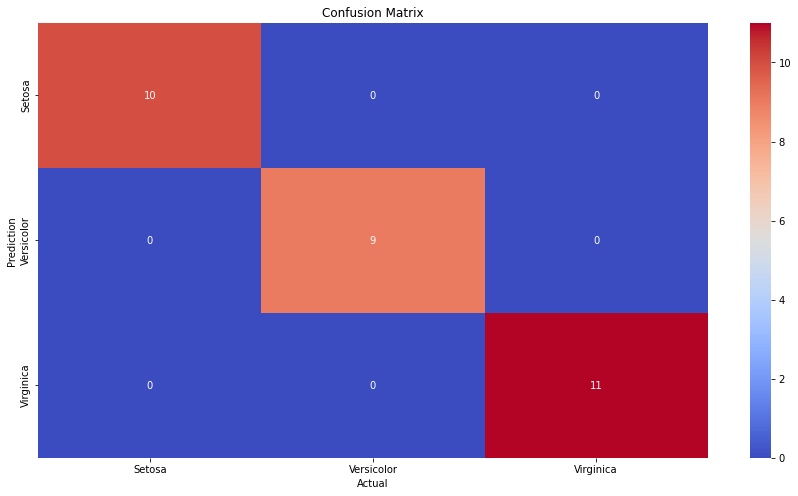

In [48]:
#Visualization of Confusion matrix using Seaborn
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,cmap='coolwarm',
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'],)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [55]:
report = classification_report(y_test,y_pred)
print(f"Classification report: \n\n {report}")

Classification report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## ----------------------------------------------------------------------------------------------------------------------------------

### Calculating True Positive,True Negative,False Positive,False Negative values for each Class

In [49]:
#For Setosa Class

tp = cm[0, 0]
fn = cm[0, 1] + cm[0, 2]
fp = cm[1, 0] + cm[2, 0]
tn = cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]

print(f"Outcome Values:\nTrue Positive : {tp} \nFalse Negative : {fn} \nFalse Positive : {fp} \nTrue Negative : {tn}")

Outcome Values:
True Positive : 10 
False Negative : 0 
False Positive : 0 
True Negative : 20


In [51]:
#For Versicolor Class

tp = cm[1, 1]
fn = cm[1, 0] + cm[1, 2]
fp = cm[0, 1] + cm[2, 1]
tn = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]

print(f"Outcome Values:\nTrue Positive : {tp} \nFalse Negative : {fn} \nFalse Positive : {fp} \nTrue Negative : {tn}")

Outcome Values:
True Positive : 9 
False Negative : 0 
False Positive : 0 
True Negative : 21


In [52]:
#For Virginica Class

tp = cm[2, 2]
fn = cm[2, 0] + cm[2, 1]
fp = cm[0, 2] + cm[1, 2]
tn = cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]

print(f"Outcome Values:\nTrue Positive : {tp} \nFalse Negative : {fn} \nFalse Positive : {fp} \nTrue Negative : {tn}")

Outcome Values:
True Positive : 11 
False Negative : 0 
False Positive : 0 
True Negative : 19


## ----------------------------------------------------------------------------------------------------------------------------------

### Calculating Accuracy,Precision,Recall,F1-Score

In [58]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred,labels = labels,pos_label=1,average = 'micro'))
print("Recall : ",recall_score(y_test,y_pred,labels = labels,pos_label=1,average = 'micro'))
print("F1-Score : ",f1_score(y_test,y_pred,labels = labels,pos_label=1,average = 'micro'))

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-Score :  1.0
